In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'
%matplotlib inline

In [2]:
import pdb
from scipy import integrate
from scipy import special
import numpy as np
from cmath import *
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
from patch_geo_func import x_ep, y_ep
from sys import stdout
import warnings
np.seterr(invalid = 'raise', under = 'ignore', over = 'ignore')

{'divide': 'raise', 'over': 'raise', 'under': 'raise', 'invalid': 'raise'}

In [3]:
from assign_attr import *
from repel_system import *

In [4]:
LR_Pi_file = 'Ny-2-LR_Pi.bin'
#pos_file = 'server_data/test_3d_pos.bin'
#pos_file = 'server_data/test_low_3d_pos.bin'
#LR_Pi_file = 'Ny-2-LR_Pi.bin'
#pos_file = 'ss_low_3d_pos.bin'
pos_file = 'ss_low_closer_pos3.bin'
#pos_file = 'ss_pos_file.bin'
OD_file = 'ss_od_file.bin'
OR_file = 'ORcolor.bin'
vpos_file = 'vpos.bin'
nblock = 32 #5209 #32
blockSize = 1024
uniform_pos_file = 'uniform_' + pos_file

a = 0.635
b = 96.7
k = np.sqrt(140)*0.873145
ecc = 2.0 # must consistent with the corresponding variables in parameter.m and macro.ipynb
p0 = -np.pi/2
p1 = np.pi/2

grid = np.array([64,104])*2
nx = grid[0]
ny = grid[1]
W = x_ep(ecc,0,k,a,b)
d = (1+2/nx)*W/nx
x = np.linspace(-W/nx, W+W/nx, nx)
W = W+2*W/nx
H = d*ny
y = np.linspace(-H/2, H/2, ny)
#mMap = macroMap(nx, ny, x, y, nblock, blockSize, LR_Pi_file, 'uniform_' + pos_file, OR_file, a, b, k, ecc, p0, p1, posUniform = True, OD_file = OD_file)
#mMap = macroMap(nx, ny, x, y, nblock, blockSize, LR_Pi_file, 'uniform_' + pos_file, OR_file, a, b, k, ecc, p0, p1, posUniform = True)
mMap = macroMap(nx, ny, x, y, nblock, blockSize, LR_Pi_file, pos_file, OR_file, a, b, k, ecc, p0, p1, posUniform = False)
#mMap = macroMap(nx, ny, x, y, nblock, blockSize, LR_Pi_file, pos_file, OR_file, a, b, k, ecc, p0, p1, posUniform = False, OD_file = OD_file)
if mMap.pODready:
    assert(np.sum(mMap.ODlabel>0) + np.sum(mMap.ODlabel<0) == mMap.networkSize)

211x342, ecc-polar grid houses 32768 neurons
require 0.086 GB


In [ ]:
fig = plt.figure('macroMap',dpi=1000)
ax1 = fig.add_subplot(132, projection='polar')
ax2 = fig.add_subplot(131)
#mMap.pODready = False
mMap.plot_map(ax1, ax2, fig.dpi, pltOD = True, pltVF = False, pltOP = False)
ax1.set_thetamin(p0/np.pi*180)
ax1.set_thetamax(p1/np.pi*180)
ax1.set_rmax(2.0)
ax1.set_rmin(0.0)
ax1.grid(False)
ax1.tick_params(labelleft=False, labelright=True,
               labeltop=False, labelbottom=True)
ax2.set_aspect('equal')
fig.savefig('sobol_test_low_density_uniform.png')
mMap.save(OD_file = 'ss_od_file.bin')

In [ ]:
# spread uniformly
fig = plt.figure('pos', dpi = 600)
dx = mMap.x[1] - mMap.x[0]
dy = mMap.y[1] - mMap.y[0]
ax1 = fig.add_subplot(121)
ax1.set_xlim(mMap.x[0]-dx/2, mMap.x[-1]+dx/2)
ax1.set_ylim(mMap.y[0]-dy/2, mMap.y[-1]+dy/2)
ax1.set_aspect('equal')
ax2 = fig.add_subplot(122)
ax2.set_xlim(mMap.x[0]-dx/2, mMap.x[-1]+dx/2)
ax2.set_ylim(mMap.y[0]-dy/2, mMap.y[-1]+dy/2)
ax2.set_aspect('equal')
dt0 = np.power(2.0,-np.arange(6,7)).reshape(1,1)
dt1 = np.power(2.0,-np.arange(8,9)).reshape(1,1)
dt = np.hstack((np.tile(dt0,(15,1)).flatten(), np.tile(dt1,(5,1)).flatten()))
oldpos, cL, cR, nL, nR = mMap.make_pos_uniform(dt, seed = 17482321, ax1 = ax1, ax2 = ax2)
fig.savefig(pos_file+'.png', dpi = 2000)
mMap.save(pos_file = uniform_pos_file)

diffuse the boudnary for spreading vpos
defining the boundary midway through the grid
0.42355088889598846
characteristic length (inter-particle-distance)
particle:
a = 0.0973151755534697
b = 0.0973151755534697
k1 = 2
k2 = 1
cl = 0.0973151755534697
boundary:
a = 0.04865758777673485
b = 0.04865758777673485
k1 = 2
k2 = 1
cl = 0.04865758777673485
2314 boundary points and 16378 particles initialized
in units of grids (0.116,0.116):
    interparticle distance (0.420,0.421)
    radius of influence for particles (1.680,1.685)
    radius of influence for boundaries (0.840,0.842)
    default limiting of displacement in one dt: (0.420, 0.421)
initialized
100.000%, 0 particles' displacement are limited, 0 particles freezed

get the index of the nearest vertex for each neuron in its own grid
calculate neurons' cortical distance to the nearest vertex in the grid
diffuse the boudnary for spreading vpos
defining the boundary midway through the grid
0.42312853038311005
characteristic length (inter-part

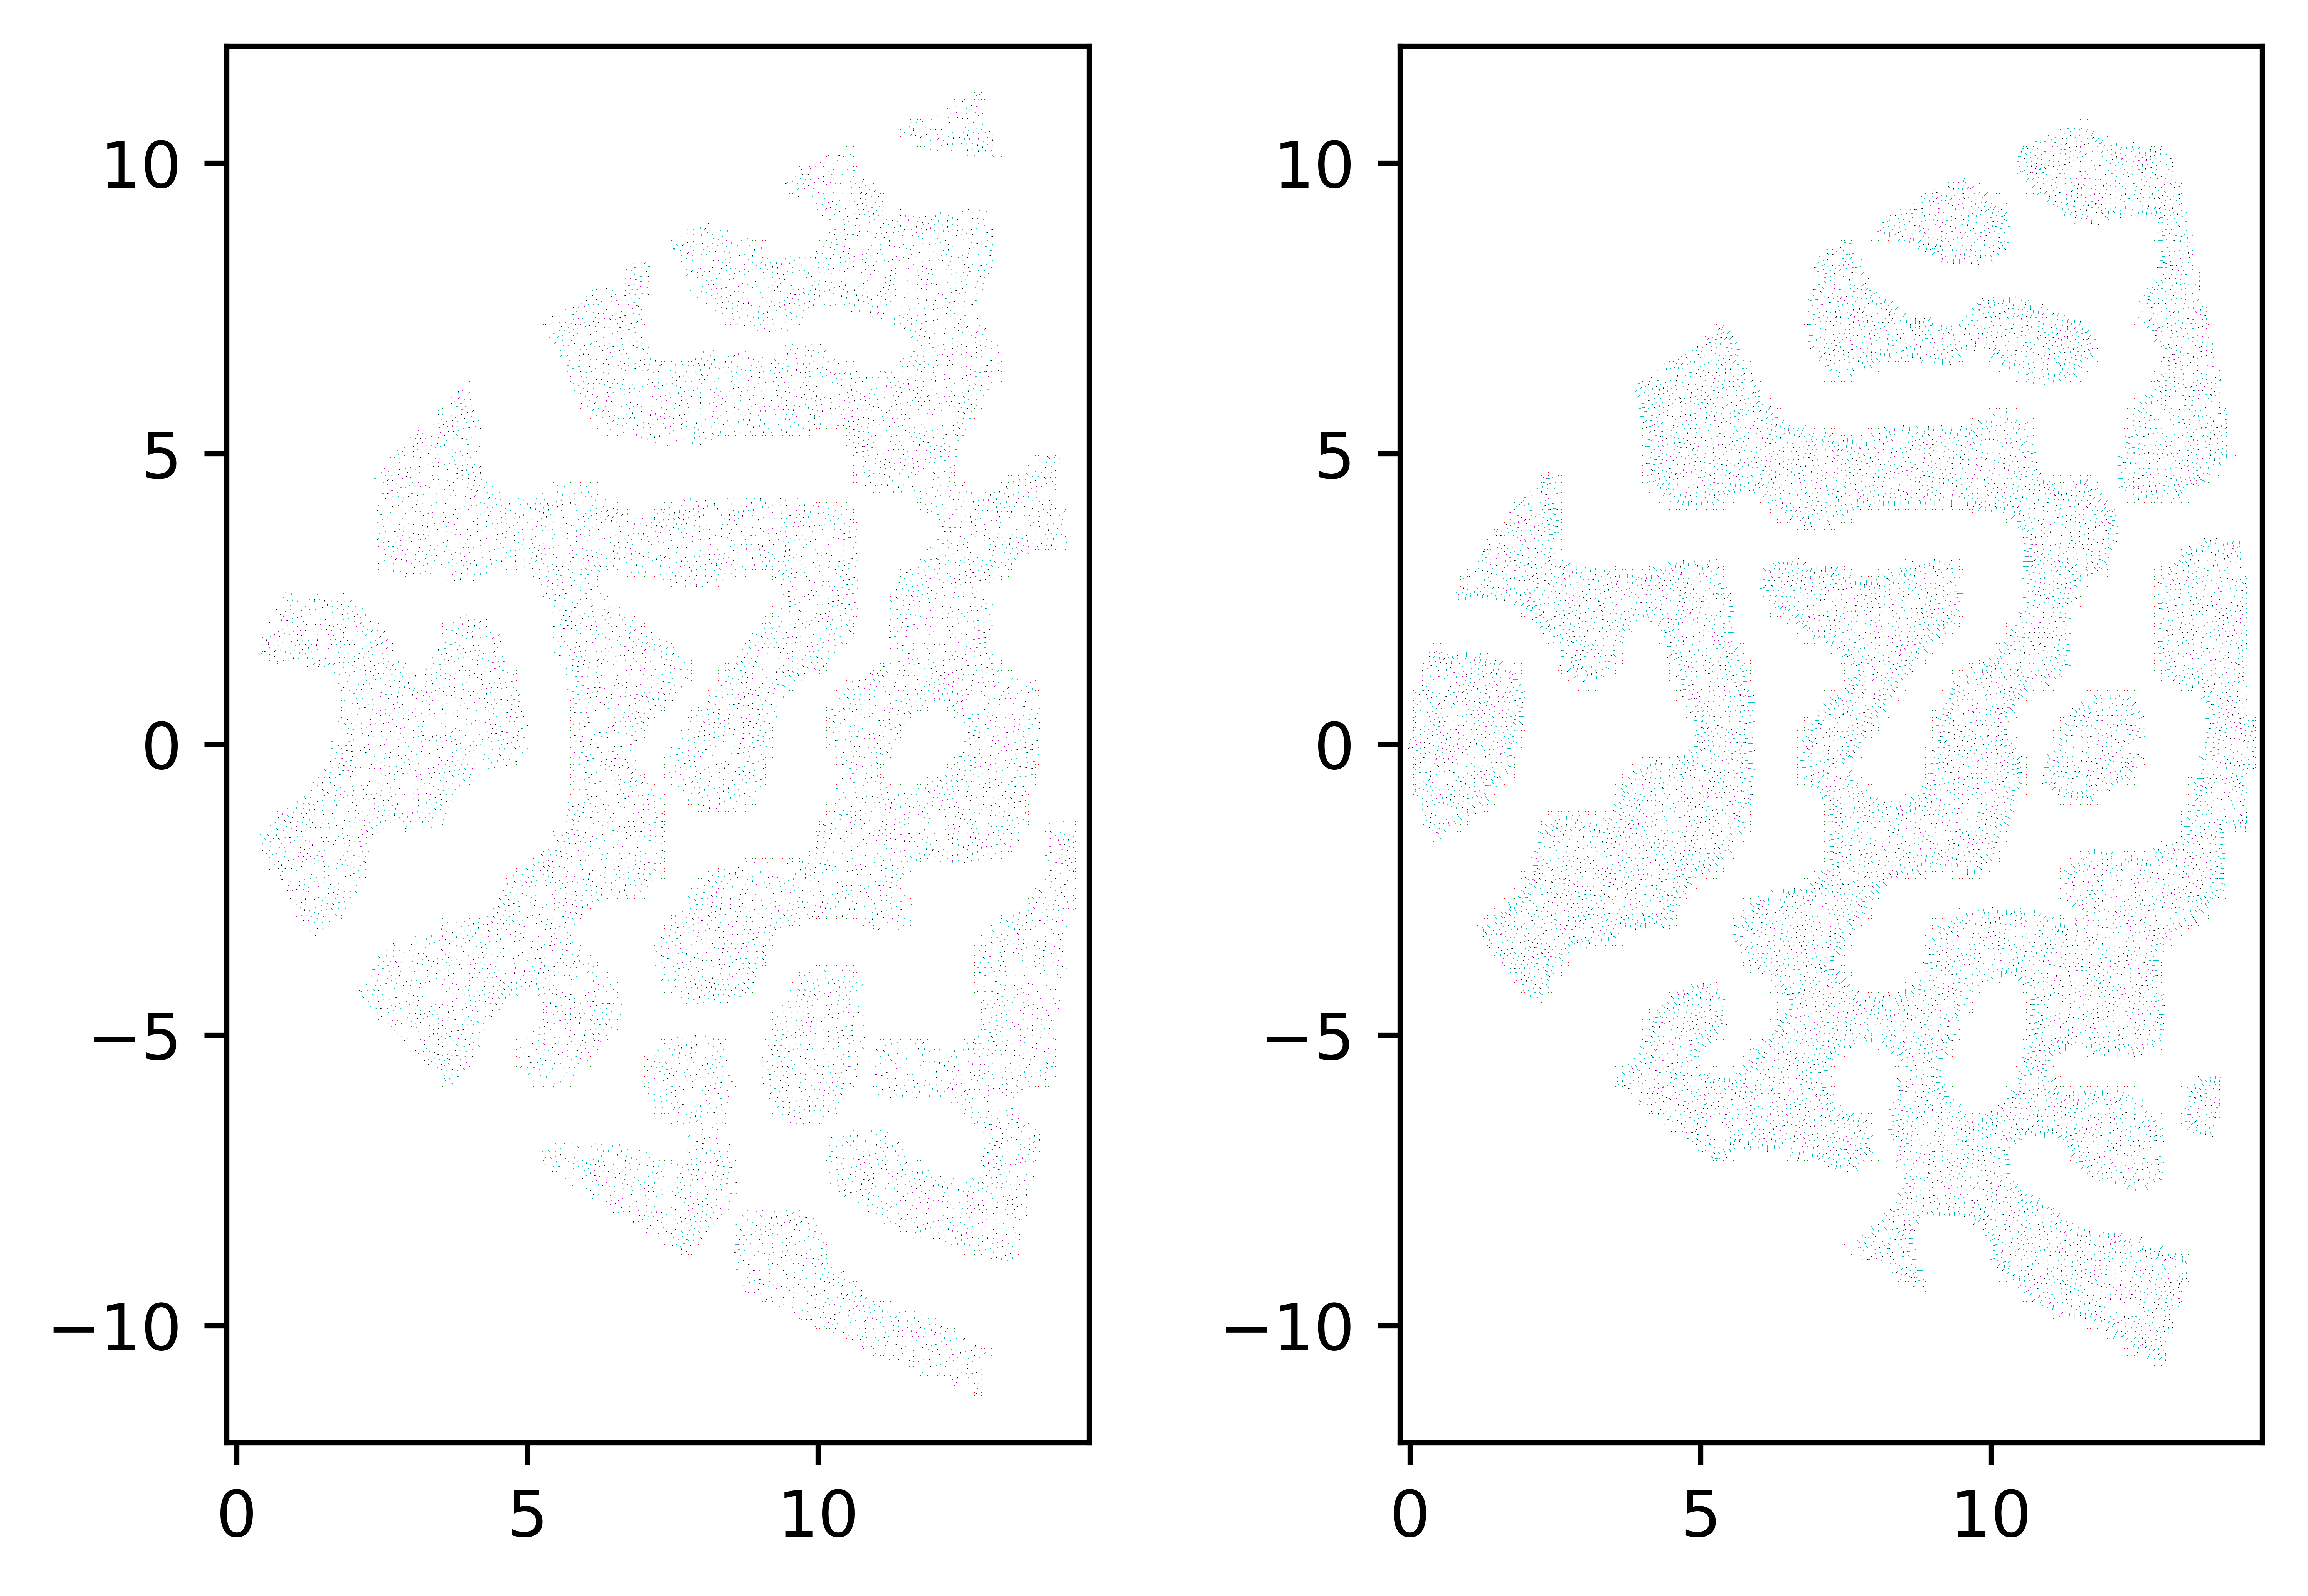

In [10]:
fig = plt.figure('vpos', dpi = 600)
dx = mMap.x[1] - mMap.x[0]
dy = mMap.y[1] - mMap.y[0]
ax1 = fig.add_subplot(121)
ax1.set_xlim(mMap.x[0]-dx/2, mMap.x[-1]+dx/2)
ax1.set_ylim(mMap.y[0]-dy/2, mMap.y[-1]+dy/2)
ax1.set_aspect('equal')
ax2 = fig.add_subplot(122)
ax2.set_xlim(mMap.x[0]-dx/2, mMap.x[-1]+dx/2)
ax2.set_ylim(mMap.y[0]-dy/2, mMap.y[-1]+dy/2)
ax2.set_aspect('equal')
dt = np.power(2.0,-np.arange(6,7)).reshape(1,1)
dt = np.tile(dt,(1,25)).flatten()
fT = True # firstTime
tmpL = 'tmpL.bin'
tmpVF_L = 'tmpVF_L.bin'
mMap.spread_pos_VF(dt, tmpVF_L, tmpL, 'L', firstTime = fT, ax = ax1)
fT = True # firstTime
tmpR = 'tmpR.bin'
tmpVF_R = 'tmpVF_R.bin'
mMap.spread_pos_VF(dt, tmpVF_R, tmpR, 'R', firstTime = fT, ax = ax2)
fig.savefig('vpos_in_cortex.png', dpi = 2000)

In [ ]:
import sys

def get_size(obj, seen=None):
    """Recursively finds size of objects"""
    size = sys.getsizeof(obj)
    if seen is None:
        seen = set()
    obj_id = id(obj)
    if obj_id in seen:
        return 0
    # Important mark as seen *before* entering recursion to gracefully handle
    # self-referential objects
    seen.add(obj_id)
    if isinstance(obj, dict):
        size += sum([get_size(v, seen) for v in obj.values()])
        size += sum([get_size(k, seen) for k in obj.keys()])
    elif hasattr(obj, '__dict__'):
        size += get_size(obj.__dict__, seen)
    elif hasattr(obj, '__iter__') and not isinstance(obj, (str, bytes, bytearray)):
        size += sum([get_size(i, seen) for i in obj])
    return size

In [14]:
import pickle
with open('sparse_mMap.pickle', 'wb') as f:
    pickle.dump(mMap, f)

AttributeError: Can't pickle local object 'macroMap.__init__.<locals>.<lambda>'

In [ ]:
per_unit_area = np.sqrt(3)*2
area = mMap.subgrid[0] * mMap.subgrid[1] * np.sum(mMap.LR == 1)
p_scale = 1.05 # potential extension
cl = np.sqrt((area/np.sum(mMap.ODlabel>0))/per_unit_area)*1.05
print(f'{np.pi*cl*cl*np.sum(mMap.ODlabel>0)} ~= {area}')
b_scale = p_scale/2 # potential extension
pk1, pk2 = 2, 1
bk1, bk2 = 2, 1
a_particle = cl*p_scale
a_boundary = cl*b_scale
epsilon = 0.01
n = 100
top = 1
bottom = 0
fig = plt.figure('potential-force', dpi = 150)
ax1 = fig.add_subplot(121)
ax1.set_ylim(bottom, top)
ax2 = fig.add_subplot(122)
ax2.set_ylim(bottom, top)
potential = L_J_potiential(a_particle,a_particle,pk1,pk2,cl*p_scale)
potential.plot(ax1,ax2,'r')
#boundary:
potential = L_J_potiential(a_boundary,a_boundary,bk1,bk2,cl*b_scale)
potential.plot(ax1,ax2,'b')

area = mMap.subgrid[0] * mMap.subgrid[1] * np.sum(mMap.Pi > 0)
cl = np.sqrt((area/np.sum(mMap.ODlabel>0))/per_unit_area)*1.05
p_scale = 1.2 # potential extension
b_scale = p_scale/2 # potential extension
a_particle = cl*p_scale
a_boundary = cl*b_scale
potential = L_J_potiential(a_particle,a_particle,pk1,pk2,cl*p_scale)
potential.plot(ax1,ax2,'m')
#boundary:
potential = L_J_potiential(a_boundary,a_boundary,bk1,bk2,cl*b_scale)
potential.plot(ax1,ax2,'c')